In [186]:
##### Proyecto final del Workshop sobre Técnicas de Programación Científica 2019 (WTPC19) - Facultad de Ciencias Químicas, Universidad Nacional de Córdoba, Córdoba, Argentina.
##### Grupo del Proyecto "Ecosistema" ('Eco'): Modelo Basado en Agentes (MBA) que simula la interacción entre predador-presa, implementado en Python3 según el paradigma de programación orientada a objetos (OOP).
## integrantes:Andres Ignacio Bertoni, Ana Carolina Pedraza De Marchi,
#          Alvaro Gabriel Piza, Guadalupe Peñaranda, Mariana Rojas.
###-----------------------------------
### 1) Se importan librerías y clases
## 1.1) Librerías
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

## 1.2) Clases
from c_presa import Presa
from c_predador import Predador
from sc_terreno import Terreno

#if __name__ == "__main__":
def main():
    ### Se definen funciones para visualizar emojis
    def crear_emoji(terreno, animal, lista_emojis):
        """..."""
        emojis = {"Comer":(":w",-90), "Perseguir":(":s",-90), "Explorar":(" ?",0), "Huir":(":o",-90), "Pastar":(":3",-90)}
        emoji = None
        try: emoji = emojis[animal.get_plan()[0]]
        except: pass
        if emoji != None:
            text_fila, text_columna = terreno.ubicar(animal)
            # Por alguna razón tienen que ir al revés fila y columna
            text_emoji = plt.text(text_columna-0.65, text_fila+0.275, emoji[0], color = "white", fontsize=35, rotation=emoji[1])
            lista_emojis.append(text_emoji)

    def borrar_emojis(lista_emojis):
        """..."""
        for text_emoji in lista_emojis:
            text_emoji.set_visible(False)

    ### 2) Se establecen los parámetros de simulación
    ## 2.1) Set de parámetros de terreno
    n_filas = 20
    n_columnas = 20
    ## 2.2) Set de parámetros para animales
    # 2.2.1) Predadores
    n_predadores = 2
    velocidad_predador = 1
    vision_predador = 4
    energia_maxima_predador = 20
    nutricion_predador = 25
    coste_moverse_predador = 2
    # 2.2.2) Presas
    n_presas = 25
    velocidad_presa = 1
    vision_presa = 5
    energia_maxima_presa = 10
    nutricion_presa = 5
    coste_moverse_presa = 2
    ## 2.3) Set de parámetros temporales
    pasos_temporales = 10
    delay_creacion = 0.1 # Tiempo de espera entre creaciones [s]
    delay_simulacion = 0.2 # Tiempo de espera entre pasos temporales [s]

    ### 3) Se construye un estado inicial
    ## 3.1) Se crea el objeto terreno
    terreno = Terreno(n_filas,n_columnas)
    # 3.1.1) Se visualiza el terreno vacío
    foto_terreno = terreno.visualizar()
    figura = plt.imshow(foto_terreno, vmin=-1, vmax=1, cmap="bwr", aspect="equal")
    # 3.1.2) Opciones globales para el visualizador
    plt.title("ECO: Simulador Predador-Presa", loc="center", fontsize=20)
    plt.xticks([])
    plt.yticks([])
    ## 3.2) Se crean e insertan animales al terreno con una posición random
    # 3.2.1) Creación de Predadores
    for i in range(n_predadores):
        predador = Predador(velocidad_predador, vision_predador, energia_maxima_predador, nutricion_predador, coste_moverse_predador)
        posicion_random = terreno.generar_posicion_random()
        terreno.insertar(predador, posicion_random)
        # 3.2.1.1) Visualización de Creación  
        foto_terreno = terreno.visualizar()  
        figura.set_data(foto_terreno)
        try: text_predadores.set_visible(False)
        except: pass
        text_predadores = plt.text(n_filas*0.07, n_columnas*1.05, "Predadores: %s"%len(terreno.get_predadores()), color = "red", fontsize=16)
        plt.draw()
        plt.pause(delay_creacion) # Pausa para humanos

    # 3.2.2) Creación de Presas
    for j in range(n_presas):
        presa = Presa(velocidad_presa, vision_presa, energia_maxima_presa, nutricion_presa, coste_moverse_presa)
        posicion_random = terreno.generar_posicion_random()
        terreno.insertar(presa, posicion_random)
        # 3.2.1.1) Visualización de Creación
        foto_terreno = terreno.visualizar()
        figura.set_data(foto_terreno)
        try: text_presas.set_visible(False)
        except: pass
        text_presas = plt.text(n_filas*0.7, n_columnas*1.05, "Presas: %s"%len(terreno.get_presas()), color = "blue", fontsize=16)
        plt.draw()
        plt.pause(delay_creacion) # Pausa para humanos
    
    ### 4) Se ejecuta la simulación
    for paso_tiempo in range(pasos_temporales):
        ### 4.0) Lista de emojis a limpiar
        lista_emojis = []
        lista_emojis2 = []
        ### 4.1) Todos los animales deciden un plan de acción
        for animal in terreno.get_animales():
            animal.decidir(terreno)
        ### 4.2) Todos los animales ejecutan su plan
        ## 4.2.1) Ejecutan los predadores
        for predador in terreno.get_predadores():
            predador.ejecutar(terreno)
            crear_emoji(terreno, predador, lista_emojis)
        ## 4.2.2) Ejecutan las presas
        for presa in terreno.get_presas():
            # 4.2.1.1) Emoticón de acción
            presa.ejecutar(terreno)
            crear_emoji(terreno, presa, lista_emojis)
        ### 4.3) Se visualiza el estado actual
        foto_terreno = terreno.visualizar()
        figura.set_data(foto_terreno)
        try: text_predadores.set_visible(False)
        except: pass
        text_predadores = plt.text(n_filas*0.07, n_columnas*1.05, "Predadores: %s"%len(terreno.get_predadores()), color = "red", fontsize=16)
        try: text_presas.set_visible(False)
        except: pass
        text_presas = plt.text(n_filas*0.7, n_columnas*1.05, "Presas: %s"%len(terreno.get_presas()), color = "blue", fontsize=16)
        #emojis
        emojis = {"Comer":(":w",0.01), "Perseguir":(":s",0.21), "Explorar":(" ?",0.42), "Huir":(":o",0.63), "Pastar":(":3",0.84),"":("",1)}
        try: text_emoji.set_visible(False)
        except: pass
        for i in emojis.items():
            text_emoji = plt.text(n_filas*i[1][1], n_columnas*1.1,i[0]+str(i[1][0]), color = "black", fontsize=16)
        plt.draw()
        plt.pause(delay_simulacion) # Pausa para humanos
        borrar_emojis(lista_emojis)

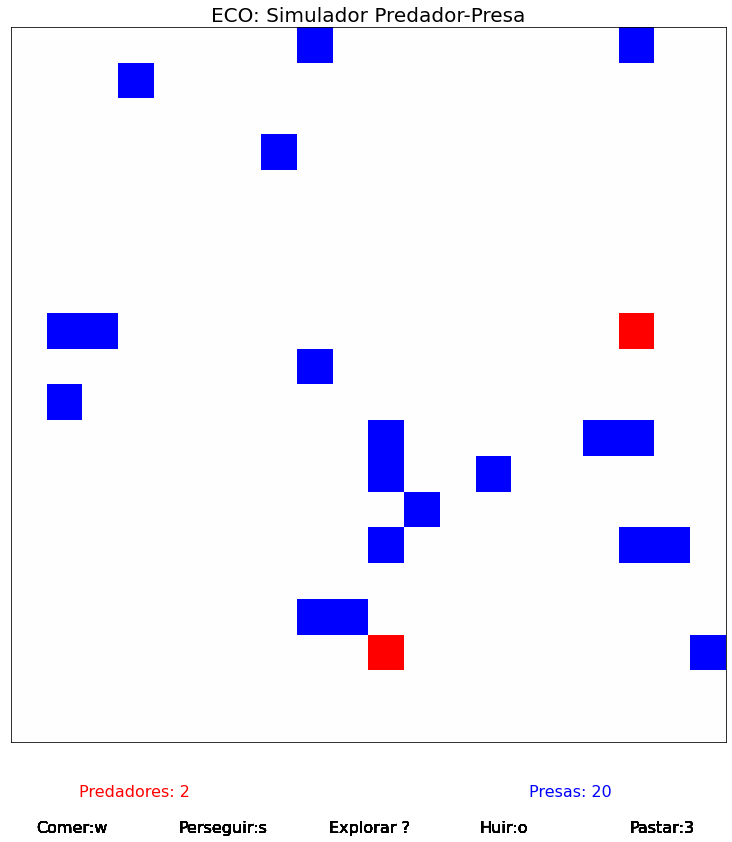

In [187]:
main()